In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std
import math

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
sns.set_palette('colorblind')

In [2]:
Combined=pd.read_csv(r"Model dataset.csv")
OLS=pd.read_csv(r"OLS_resultdf.csv")
Polynomial=pd.read_csv(r"Polynomial_resultdf.csv")
Neural_Network=pd.read_csv(r"NN_resultdf.csv")
Feature_Selection_RMSE = pd.read_csv(r"Feature_selection_RMSE.csv")
Feature_Selection_R2 = pd.read_csv(r"Feature_selection_R2.csv")

In [3]:
Combined['TIME'] = pd.to_datetime(Combined['TIME'], format='%Y')

In [4]:
def combined_model(df):
    df['H2_1'] = df.apply(lambda row: np.tanh((-0.148077722353583 + 0.0000000588859945978 * row["agri_land_area"] + 5.32504862055294e-11 * row["agri_land_area electricity net consumption (billion kWh)"] + 4.99410436552566e-16 * row["agri_land_area tertiary"] + -6.29824771022591e-14 * row["agri_land_area^2"] + -0.000563322069708134 * row["electricity net consumption (billion kWh)"] + -0.0000000295639196118 * row["electricity net consumption (billion kWh)^2"] + 0.0000634317434765068 * row["PV_cum_capacity MW last year"] + 2.25645796997847e-11 * row["PV_cum_capacity MW last year agri_land_area"] + -0.0000000195809841912 * row["PV_cum_capacity MW last year electricity net consumption (billion kWh)"] + 1.33807798237485e-14 * row["PV_cum_capacity MW last year tertiary"] + 5.50319392936501e-14 * row["PV_cum_capacity MW last year total_population"] + -0.0000000011829955135 * row["PV_cum_capacity MW last year^2"] + -0.0000000013319569679 * row["tertiary"] + 2.15170513905742e-13 * row["tertiary electricity net consumption (billion kWh)"] + 6.53729782053154e-18 * row["tertiary^2"] + -0.0000000007948529308 * row["total_population"] + 6.74748653570475e-17 * row["total_population agri_land_area"] + 1.22413472645724e-13 * row["total_population electricity net consumption (billion kWh)"] + 1.4367116137337e-18 * row["total_population tertiary"] + 3.60528929750744e-20 * row["total_population^2"])), axis=1)
    df['H2_2'] = df.apply(lambda row: np.tanh((-0.220525229279219 + -0.000000018896975675 * row["agri_land_area"] + 5.44409159389355e-11 * row["agri_land_area electricity net consumption (billion kWh)"] + 4.90199735850452e-17 * row["agri_land_area tertiary"] + -9.21039323710036e-15 * row["agri_land_area^2"] + -0.00011451093673862 * row["electricity net consumption (billion kWh)"] + 0.0000000330258211206 * row["electricity net consumption (billion kWh)^2"] + -0.0000488760896163239 * row["PV_cum_capacity MW last year"] + 3.25607932905717e-12 * row["PV_cum_capacity MW last year agri_land_area"] + 0.0000000044840865724 * row["PV_cum_capacity MW last year electricity net consumption (billion kWh)"] + 3.76532215438948e-14 * row["PV_cum_capacity MW last year tertiary"] + 1.68075759154872e-14 * row["PV_cum_capacity MW last year total_population"] + 0.000000000620706554 * row["PV_cum_capacity MW last year^2"] + -0.0000000030651426959 * row["tertiary"] + -1.89661249807507e-13 * row["tertiary electricity net consumption (billion kWh)"] + -4.35595013268867e-18 * row["tertiary^2"] + -3.02390608490849e-10 * row["total_population"] + 1.02983861578553e-16 * row["total_population agri_land_area"] + 1.35677031170935e-13 * row["total_population electricity net consumption (billion kWh)"] + -8.84278416036697e-19 * row["total_population tertiary"] + -1.4747808703248e-19 * row["total_population^2"])), axis=1)
    df['H2_3'] = df.apply(lambda row: np.tanh((0.0815992330895154 + -0.0000002134858347659 * row["agri_land_area"] + -3.68653378652488e-11 * row["agri_land_area electricity net consumption (billion kWh)"] + -3.34270823230289e-16 * row["agri_land_area tertiary"] + 3.51272925392697e-14 * row["agri_land_area^2"] + 0.000042285738022081 * row["electricity net consumption (billion kWh)"] + 0.0000000044790157708 * row["electricity net consumption (billion kWh)^2"] + 0.0000571419375793 * row["PV_cum_capacity MW last year"] + -7.49572398122515e-12 * row["PV_cum_capacity MW last year agri_land_area"] + 0.0000000021441568958 * row["PV_cum_capacity MW last year electricity net consumption (billion kWh)"] + 2.3618626847282e-14 * row["PV_cum_capacity MW last year tertiary"] + 7.40843568069911e-15 * row["PV_cum_capacity MW last year total_population"] + -0.000000001265365793 * row["PV_cum_capacity MW last year^2"] + -0.0000000004189050643 * row["tertiary"] + 8.99657081604598e-14 * row["tertiary electricity net consumption (billion kWh)"] + -2.43520886593176e-18 * row["tertiary^2"] + -0.0000000004994917879 * row["total_population"] + -7.59186993668779e-17 * row["total_population agri_land_area"] + -5.93299958318299e-14 * row["total_population electricity net consumption (billion kWh)"] + -1.10320883617701e-18 * row["total_population tertiary"] + -3.7950287386739e-19 * row["total_population^2"])), axis=1)
    df['H2_4'] = df.apply(lambda row: np.tanh((-0.258744772020567 + -0.0000000198194412721 * row["agri_land_area"] + 1.01217645307726e-11 * row["agri_land_area electricity net consumption (billion kWh)"] + 1.41252826613413e-17 * row["agri_land_area tertiary"] + -1.58886781815028e-15 * row["agri_land_area^2"] + -0.0000138676343393997 * row["electricity net consumption (billion kWh)"] + 0.0000000051654154199 * row["electricity net consumption (billion kWh)^2"] + -0.0000674105604880647 * row["PV_cum_capacity MW last year"] + 2.27244330279431e-12 * row["PV_cum_capacity MW last year agri_land_area"] + -0.0000000016485281835 * row["PV_cum_capacity MW last year electricity net consumption (billion kWh)"] + -5.22554808803909e-15 * row["PV_cum_capacity MW last year tertiary"] + 1.41667660431288e-15 * row["PV_cum_capacity MW last year total_population"] + 2.34993381695295e-10 * row["PV_cum_capacity MW last year^2"] + -0.0000000013884712944 * row["tertiary"] + 4.81591370746617e-14 * row["tertiary electricity net consumption (billion kWh)"] + -1.03643245513507e-19 * row["tertiary^2"] + -3.11611631795814e-10 * row["total_population"] + -8.60322161136048e-17 * row["total_population agri_land_area"] + -8.35281505778409e-15 * row["total_population electricity net consumption (billion kWh)"] + -1.21687602936593e-19 * row["total_population tertiary"] + -3.58703630254189e-19 * row["total_population^2"])), axis=1)
    df['H2_5'] = df.apply(lambda row: np.tanh((0.0552644447966678 + -0.0000002319074361763 * row["agri_land_area"] + 3.44090696006042e-11 * row["agri_land_area electricity net consumption (billion kWh)"] + -1.16647061758418e-16 * row["agri_land_area tertiary"] + -5.7448068091423e-15 * row["agri_land_area^2"] + 0.000202282878653316 * row["electricity net consumption (billion kWh)"] + 0.0000000380377897999 * row["electricity net consumption (billion kWh)^2"] + 0.0000475372521623557 * row["PV_cum_capacity MW last year"] + 1.27458633487531e-12 * row["PV_cum_capacity MW last year agri_land_area"] + -0.0000000013161860583 * row["PV_cum_capacity MW last year electricity net consumption (billion kWh)"] + 1.43814285859257e-14 * row["PV_cum_capacity MW last year tertiary"] + -8.59074313456498e-17 * row["PV_cum_capacity MW last year total_population"] + 0.0000000003768671402 * row["PV_cum_capacity MW last year^2"] + -0.000000001785636545 * row["tertiary"] + 7.21333322388789e-14 * row["tertiary electricity net consumption (billion kWh)"] + -4.87295666544587e-19 * row["tertiary^2"] + -1.16851623764042e-10 * row["total_population"] + 6.57963582966955e-17 * row["total_population agri_land_area"] + 6.60637144531061e-14 * row["total_population electricity net consumption (billion kWh)"] + 6.76732009805671e-19 * row["total_population tertiary"] + 1.81198123951659e-19 * row["total_population^2"])), axis=1)
    df['H1_1'] = df.apply(lambda row: np.tanh((-0.0539862007856807 + 0.390124368603199 * row['H2_1'] + -0.108138209060474 * row['H2_2'] + 0.195669841801991 * row['H2_3'] + 0.0285151899768917 * row['H2_4'] + 0.143651693358339 * row['H2_5'])), axis=1)
    df['H1_2'] = df.apply(lambda row: np.tanh((0.533170291006793 + -0.265863105507073 * row['H2_1'] + -0.439309526617945 * row['H2_2'] + 0.35885628337546 * row['H2_3'] + -0.059189134168981 * row['H2_4'] + 0.0867998715235297 * row['H2_5'])), axis=1)
    df['H1_3'] = df.apply(lambda row: np.tanh((-0.0619103879750471 + -0.219206661032209 * row['H2_1'] + 0.124141360666587 * row['H2_2'] + -0.142152529109469 * row['H2_3'] + 0.221618291603619 * row['H2_4'] + -0.21185294201112 * row['H2_5'])), axis=1)
    df['H1_4'] = df.apply(lambda row: np.tanh((0.00279317676771718 + -0.00202735282954745 * row['H2_1'] + 0.024625682930347 * row['H2_2'] + -0.0776662113058534 * row['H2_3'] + 0.0339284055779483 * row['H2_4'] + -0.00740158676319848 * row['H2_5'])), axis=1)
    df['H1_5'] = df.apply(lambda row: np.tanh((-0.485179797313408 + -0.41291721854338 * row['H2_1'] + -0.231488721779553 * row['H2_2'] + 0.250805174303662 * row['H2_3'] + 0.149559737764516 * row['H2_4'] + -0.169603262799752 * row['H2_5'])), axis=1)
    df["Predicted_PV_capacity_additions_MW"] = df.apply(lambda row: (53545.5675300834 + -15521.1880757344 * row['H1_1'] + -69042.8077872028 * row['H1_2'] + -62416.5052391983 * row['H1_3'] + 7501.51351162299 * row['H1_4'] + 53831.0800648976 * row['H1_5']), axis=1)
    return df

In [5]:
combined_model(Combined)

,Column 1,TIME,Country,PV_cum_capacity MW last year,total_population,agri_land_area,tertiary,electricity net consumption (billion kWh),PV_cum_capacity MW last year^2,PV_cum_capacity MW last year total_population,...,H2_2,H2_3,H2_4,H2_5,H1_1,H1_2,H1_3,H1_4,H1_5,Predicted_PV_capacity_additions_MW
0,499,2018-01-01,Croatia,60.000,4087843,14840.00,2.765599e+06,16.771772,3600.000000,2.452706e+08,...,-0.231116,0.079143,-0.262170,0.052639,-0.075046,0.620170,-0.135560,-0.018007,-0.375313,14.680902
1,1317,2009-01-01,North Macedonia,0.000,2050671,10130.00,8.058327e+05,6.732520,0.000000,0.000000e+00,...,-0.220874,0.078191,-0.255043,0.052557,-0.073985,0.616000,-0.133808,-0.017450,-0.378596,4.255261
2,637,2003-01-01,Ethiopia,0.000,72170581,316070.00,1.666621e+06,2.090040,0.000000,0.000000e+00,...,-0.247780,-0.023079,-0.285658,-0.027093,-0.118048,0.603930,-0.104513,-0.010618,-0.373521,17.494748
3,1427,2009-01-01,Poland,0.000,38151603,156190.00,2.758844e+07,127.498000,0.000000,0.000000e+00,...,-0.324278,0.017796,-0.304625,-0.006655,-0.126621,0.646424,-0.112875,-0.016328,-0.329158,83.763253
4,334,2016-01-01,Burundi,3.103,10488002,20330.00,3.860718e+05,0.271120,9.628609,3.254427e+07,...,-0.221704,0.071872,-0.257308,0.048832,-0.076370,0.614976,-0.132384,-0.017025,-0.378946,7.419710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,496,2015-01-01,Croatia,33.000,4203604,15372.00,2.795019e+06,15.866320,1089.000000,1.387189e+08,...,-0.229907,0.077390,-0.260545,0.050984,-0.076200,0.619516,-0.134197,-0.017771,-0.375030,9.646230
1839,49,2016-01-01,Angola,12.867,28842482,558423.80,2.692809e+06,9.036511,165.559689,3.711162e+08,...,-0.245615,-0.043444,-0.278110,-0.080306,-0.117918,0.590189,-0.095117,-0.008395,-0.380318,28.403136
1840,769,2003-01-01,Guyana,0.011,745142,11341.03,5.696342e+04,0.677000,0.000121,8.196562e+03,...,-0.217678,0.078652,-0.253633,0.052535,-0.072116,0.614288,-0.134329,-0.017370,-0.380847,5.362796
1841,1027,2016-01-01,Lithuania,69.000,2868231,29539.00,2.039844e+06,10.497580,4761.000000,1.979079e+08,...,-0.228642,0.077197,-0.261629,0.049820,-0.073476,0.617799,-0.135726,-0.017769,-0.378120,15.129577


In [6]:
Combined_Test = Combined[Combined['set'] == 'Test']
Combined_Train = Combined[Combined['set'] == 'Train']
OLS_Test = OLS[OLS['set'] == 'test']
Polynomial_Test = Polynomial[Polynomial['set'] == 'test']
Neural_Network_Test = Neural_Network[Neural_Network['set'] == 'test']

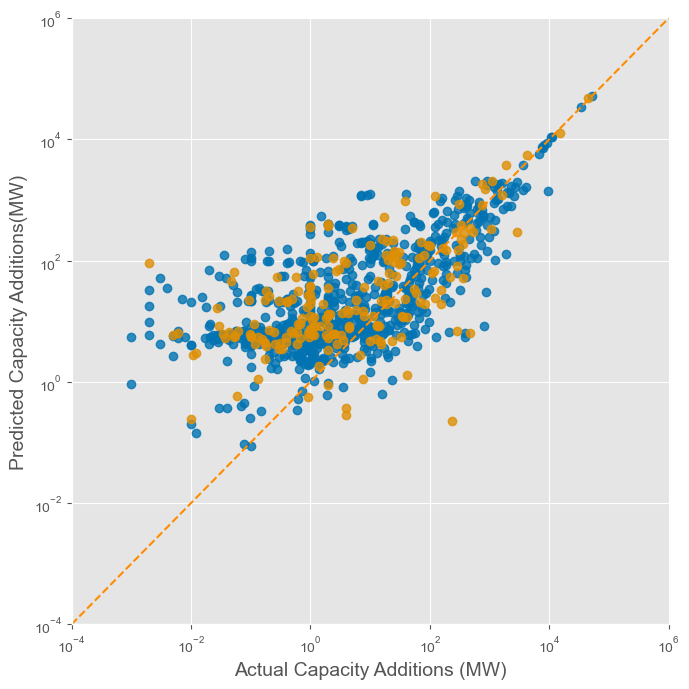

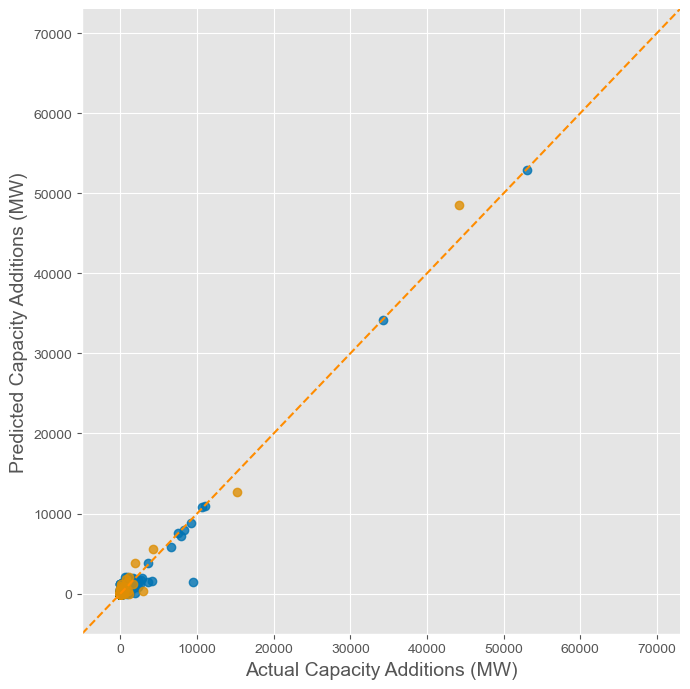

In [7]:
# Plot Actual vs predicted capacity additions for the combined model
# Logarithmic plot
sns.lmplot(x='PV_capacity_additions_MW', y='Predicted_PV_capacity_additions_MW', data=Combined, fit_reg=False, height=7, hue='set', hue_order=['Train','Test'], legend=False)

plt.yscale("log")
plt.xscale("log")
plt.ylim(0.0001, 1000000)
plt.xlim(0.0001, 1000000)
line_coords = np.arange(0.0001, 
                        1000000)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted Capacity Additions(MW)', fontsize=14)
plt.xlabel('Actual Capacity Additions (MW)', fontsize=14)
# plt.savefig('FIG4.eps', format='eps', dpi=1200, bbox_inches="tight")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
    
# Plotting the observed vs predicted values from the training and test set linear
sns.lmplot(x='PV_capacity_additions_MW', y='Predicted_PV_capacity_additions_MW', data=Combined, fit_reg=False, height=7, hue='set',hue_order=['Train','Test'], legend=False)
plt.ylim(-5000, 73000)
plt.xlim(-5000, 73000)
# Plotting the diagonal line
line_coords = np.arange(-5000, 
                        73000)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.ylabel('Predicted Capacity Additions (MW)', fontsize=14)
plt.xlabel('Actual Capacity Additions (MW)', fontsize=14)
# plt.savefig('FIG3.eps', format='eps', dpi=1200, bbox_inches="tight")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

In [8]:
def country_cumulative_error(df):
    df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
    df['Predicted_Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['Predicted_PV_capacity_additions_MW']
    df['Cumulative_Residual']=df['Cumulative_PV_Capacity_MW']-df['Predicted_Cumulative_PV_Capacity_MW']
    # df['Cumulative_percentage_error']=(df['Cumulative_Residual']/df['Cumulative_PV_Capacity_MW'])*100
    countrymcap= df.groupby("Country")['Cumulative_PV_Capacity_MW'].mean().to_frame()
    # calculating the mean absolute error per country in the test set
    countrymae = df.groupby("Country")['Cumulative_Residual'].mean().to_frame()
    countrymcap = pd.concat([countrymcap, countrymae], axis=1)
    countrymcap = countrymcap.rename(columns = {'Cumulative_PV_Capacity_MW':'MCAP','Cumulative_Residual':'MAE'})
    countrymcap['Country_Error']= (countrymcap['MAE']/countrymcap['MCAP'])*100
    countrymcap = countrymcap.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    print(countrymcap)
    # countrymcap.to_csv(r"meanerror1.csv")
    # countrymcap.to_csv(r"country_cumulative_error.csv")
    plt.figure(figsize=(8, 20))
    countrymcap['Country_Error'].abs().sort_values().plot(kind='barh', legend=None)
    plt.xlabel('Country Error (%)')
    plt.ylabel('')
    plt.xscale('log')
    # plt.savefig('FIG5.eps', format='eps', dpi=1200, bbox_inches="tight")
    plt.show()
    return

                           MCAP        MAE  Country_Error
Country                                                  
Afghanistan            6.673333 -17.314717    -259.461291
Albania                0.506944  -4.751241    -937.231090
Algeria               64.252941  27.057605      42.111076
Angola                 5.224444 -30.005892    -574.336520
Antigua and Barbuda    0.200000  -5.786712   -2893.356211
...                         ...        ...            ...
Ukraine              152.128571   9.599384       6.310047
Uruguay               34.136867  13.827008      40.504619
Uzbekistan             0.682778   6.693746     980.369613
Yemen                  0.423600  -4.685242   -1106.053275
Zimbabwe               2.677286  -1.866182     -69.704237

[134 rows x 3 columns]


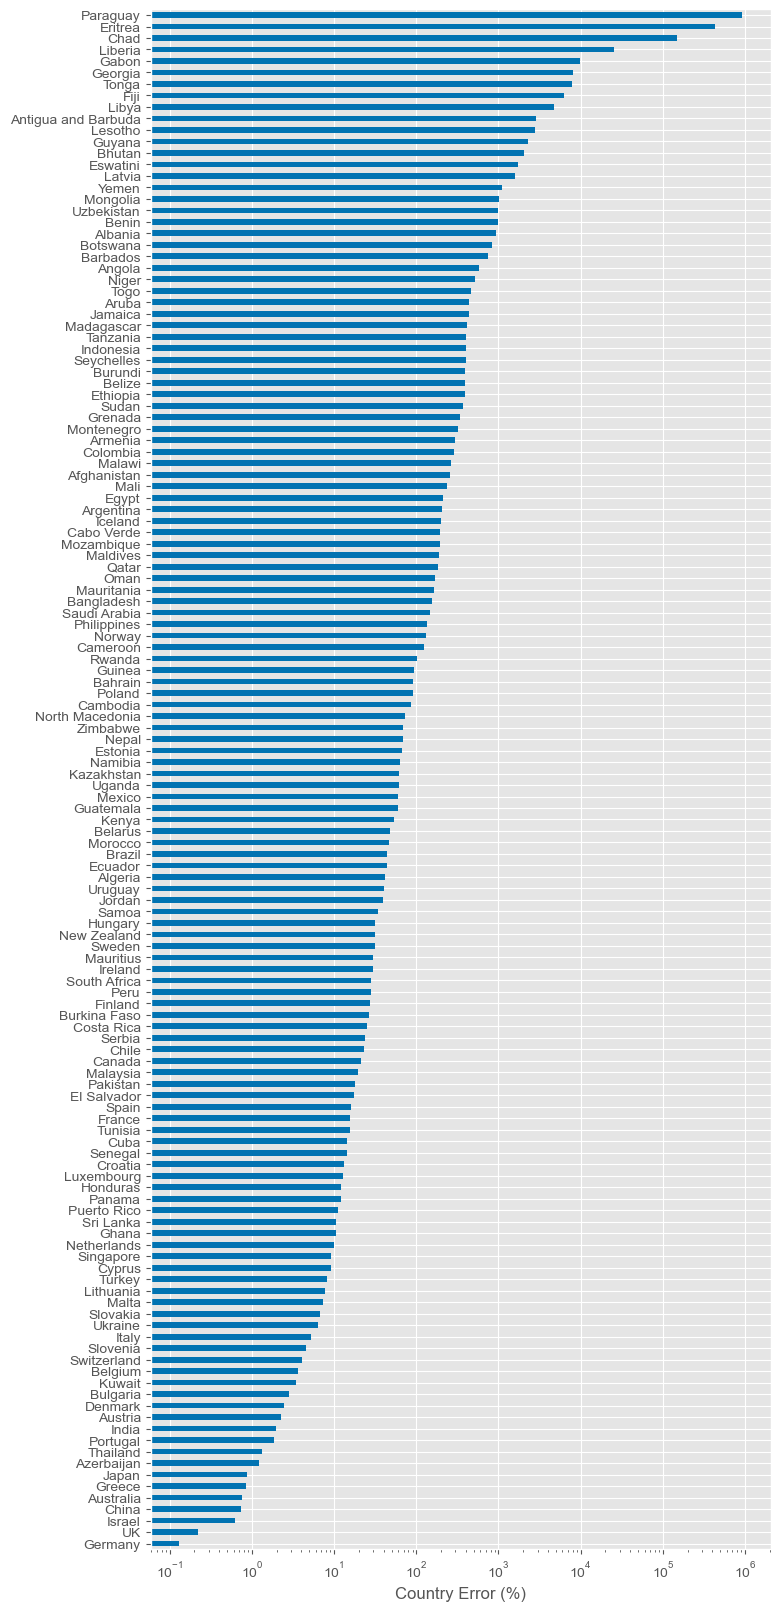

In [9]:
country_cumulative_error(Combined)

In [10]:
def yearly_error(df):
    df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
    df['Predicted_Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['Predicted_PV_capacity_additions_MW']
    df['Cumulative_Residual']=df['Cumulative_PV_Capacity_MW']-df['Predicted_Cumulative_PV_Capacity_MW']
    # # To calculate the average capacity, mea, and normalized error per year
    yearlymcap = df.groupby("TIME")['Cumulative_PV_Capacity_MW'].mean().to_frame()
    yearlymae= df.groupby("TIME")['Cumulative_Residual'].mean().abs().to_frame()
    yearlymcap = pd.concat([yearlymcap, yearlymae], axis=1)
    yearlymcap = yearlymcap.rename(columns = {'Cumulative_PV_Capacity_MW':'MCAP','Cumulative_Residual':'MAE'})
    yearlymcap['Yearly_Error'] = (yearlymcap['MAE']/yearlymcap['MCAP'])*100     
    print(yearlymcap)

    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=yearlymcap, x="TIME", y="MCAP")
    plt.ylabel('Average Cumulative Capacity (MW)')
    plt.xlabel('Year')
    plt.yscale('log')
    # plt.savefig('FIG6.eps', format='eps', dpi=1200, bbox_inches = 'tight')
    plt.show()


    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=yearlymcap, x="TIME", y="Yearly_Error")
    plt.ylabel('Yearly Error (%)')
    plt.xlabel('Year')
    plt.yscale('log')
    # plt.savefig('FIG7.eps', format='eps', dpi=1200, bbox_inches = 'tight')
    plt.show()
    return 

                   MCAP         MAE  Yearly_Error
TIME                                             
2001-01-01     1.841638   26.585795   1443.594827
2002-01-01     2.219951   25.242659   1137.081828
2003-01-01     2.781333   24.945668    896.896026
2004-01-01     3.411722   20.627728    604.613482
2005-01-01     4.238232   27.041393    638.034711
2006-01-01     6.205429   27.398609    441.526452
2007-01-01    10.470983   30.048743    286.971556
2008-01-01    47.420210    0.554894      1.170163
2009-01-01    64.854910   26.052287     40.170107
2010-01-01   114.287781    2.247809      1.966797
2011-01-01   282.843046  102.402702     36.204780
2012-01-01   429.434810   23.265145      5.417620
2013-01-01   971.301462    2.440271      0.251237
2014-01-01  1177.613837   21.867509      1.856934
2015-01-01  1376.691270    6.879575      0.499718
2016-01-01  2346.312792   40.890871      1.742772
2017-01-01  3118.064114   36.152010      1.159438
2018-01-01  3967.385495   21.887633      0.551689


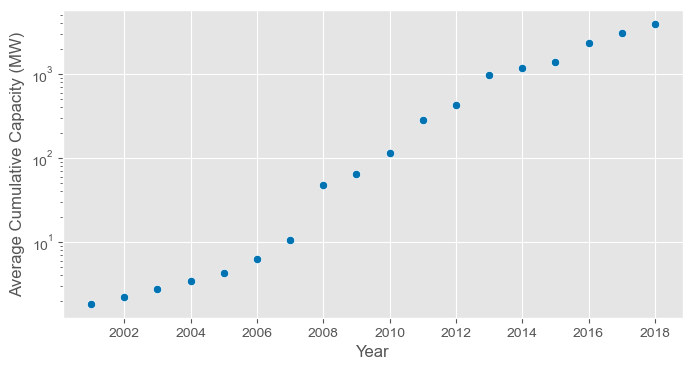

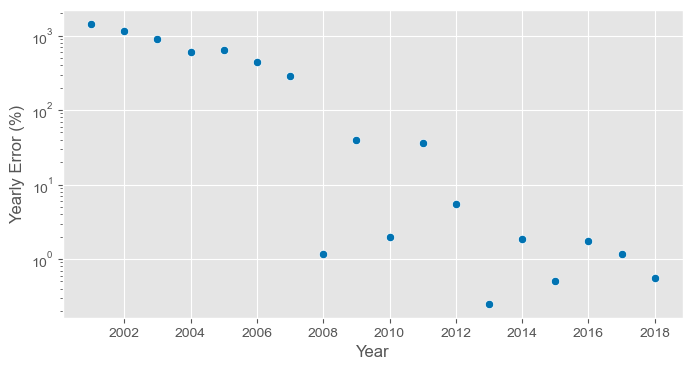

In [11]:
yearly_error(Combined)

In [12]:
def global_error(df, df_name):
    print("Test R2 score for the", df_name, " model is:" ,r2_score(df['PV_capacity_additions_MW'], df['Predicted_PV_capacity_additions_MW']))
    mae = mean_absolute_error(df['PV_capacity_additions_MW'], df['Predicted_PV_capacity_additions_MW'])
    print("The Mean Absolute Error for the", df_name, "model is:", mae, "MW")
    mse = mean_squared_error(df['PV_capacity_additions_MW'], df['Predicted_PV_capacity_additions_MW'])
    print("The Mean Squared Error for the", df_name, "model is:", mse, "MW\u00B2")
    rmse = np.sqrt(mse)
    print("The Root Mean Squared Error for the", df_name, "model is:", rmse, "MW")
    df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
    mean_cumulative_capacity=df['Cumulative_PV_Capacity_MW'].mean()
    Global_Error_Cumulative=(mae/mean_cumulative_capacity)*100
    return print("The Global Error for the", df_name,"model is: ", Global_Error_Cumulative, "%")

In [13]:
# Comparison between the different models
global_error(Combined_Test, "Combined")
global_error(OLS_Test, "OLS")
global_error(Polynomial_Test, "Polynomial")
global_error(Neural_Network, "Neural Network")

Test R2 score for the Combined  model is: 0.9792526445733344
The Mean Absolute Error for the Combined model is: 89.25088272662278 MW
The Mean Squared Error for the Combined model is: 124031.06413405451 MW²
The Root Mean Squared Error for the Combined model is: 352.18044257745845 MW
The Global Error for the Combined model is:  9.745359341222684 %
Test R2 score for the OLS  model is: 0.9237927522833752
The Mean Absolute Error for the OLS model is: 330.44508904400544 MW
The Mean Squared Error for the OLS model is: 455579.31768364925 MW²
The Root Mean Squared Error for the OLS model is: 674.9661603989116 MW
The Global Error for the OLS model is:  36.08150459575871 %
Test R2 score for the Polynomial  model is: 0.6777562954788251
The Mean Absolute Error for the Polynomial model is: 172.5300983579458 MW
The Mean Squared Error for the Polynomial model is: 1926425.2604884699 MW²
The Root Mean Squared Error for the Polynomial model is: 1387.9572257416544 MW
The Global Error for the Polynomial mo

C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning:

In [15]:
# calculate the global error for different capacity values
low_capacity_countries = Combined[(Combined['PV_capacity_additions_MW'] < 1)]
high_capacity_countries = Combined[(Combined['PV_capacity_additions_MW'] > 1000)]
med_capacity_countries = Combined[(Combined['PV_capacity_additions_MW'] >= 1) & (Combined['PV_capacity_additions_MW'] <= 1000)]
global_error(high_capacity_countries, ">1 GW" )
global_error(med_capacity_countries, "between 1 MW and 1 GW" )
global_error(low_capacity_countries, "<1 MW" )



Test R2 score for the >1 GW  model is: 0.9739695206815916
The Mean Absolute Error for the >1 GW model is: 1087.333053727485 MW
The Mean Squared Error for the >1 GW model is: 3008051.6170298285 MW²
The Root Mean Squared Error for the >1 GW model is: 1734.3735517557423 MW
The Global Error for the >1 GW model is:  4.519829947283658 %
Test R2 score for the between 1 MW and 1 GW  model is: -0.8237527987815803
The Mean Absolute Error for the between 1 MW and 1 GW model is: 102.79114647405282 MW
The Mean Squared Error for the between 1 MW and 1 GW model is: 50294.63519843395 MW²
The Root Mean Squared Error for the between 1 MW and 1 GW model is: 224.26465436718723 MW
The Global Error for the between 1 MW and 1 GW model is:  19.068044387115062 %
Test R2 score for the <1 MW  model is: -350.4403884465931
The Mean Absolute Error for the <1 MW model is: 15.436369974053912 MW
The Mean Squared Error for the <1 MW model is: 1289.6940548366515 MW²
The Root Mean Squared Error for the <1 MW model is: 35

C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning:

In [16]:
# Errors for the test set
low_capacity_countries = Combined_Test[(Combined_Test['PV_capacity_additions_MW'] < 1)]
high_capacity_countries = Combined_Test[(Combined_Test['PV_capacity_additions_MW'] > 1000)]
med_capacity_countries = Combined_Test[(Combined_Test['PV_capacity_additions_MW'] >= 1) & (Combined_Test['PV_capacity_additions_MW'] <= 1000)]
global_error(high_capacity_countries, ">1 GW" )
global_error(med_capacity_countries, "between 1 MW and 1 GW" )
global_error(low_capacity_countries, "<1 MW" )

Test R2 score for the >1 GW  model is: 0.9756497759209916
The Mean Absolute Error for the >1 GW model is: 1748.3494032698845 MW
The Mean Squared Error for the >1 GW model is: 4393581.893033907 MW²
The Root Mean Squared Error for the >1 GW model is: 2096.0872818262856 MW
The Global Error for the >1 GW model is:  6.158748255699405 %
Test R2 score for the between 1 MW and 1 GW  model is: -0.7984012198818833
The Mean Absolute Error for the between 1 MW and 1 GW model is: 94.93150575821937 MW
The Mean Squared Error for the between 1 MW and 1 GW model is: 40821.52505178887 MW²
The Root Mean Squared Error for the between 1 MW and 1 GW model is: 202.04337418432922 MW
The Global Error for the between 1 MW and 1 GW model is:  16.747712427896282 %
Test R2 score for the <1 MW  model is: -616.8636698765375
The Mean Absolute Error for the <1 MW model is: 17.763728593382385 MW
The Mean Squared Error for the <1 MW model is: 2319.1460041386686 MW²
The Root Mean Squared Error for the <1 MW model is: 48.

C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative_PV_Capacity_MW']=df['PV_cum_capacity MW last year']+df['PV_capacity_additions_MW']
C:\Users\hussa\AppData\Local\Temp\ipykernel_29356\3415593530.py:9: SettingWithCopyWarning:

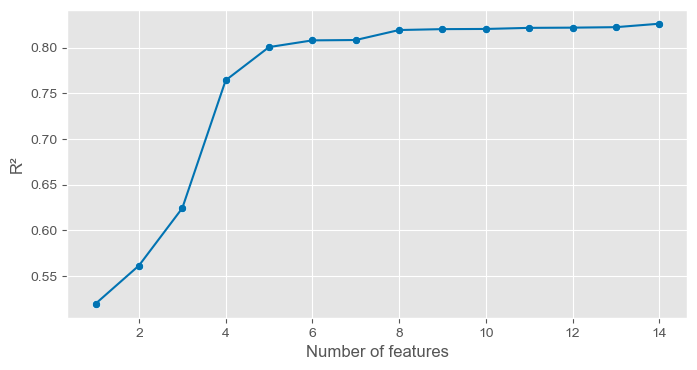

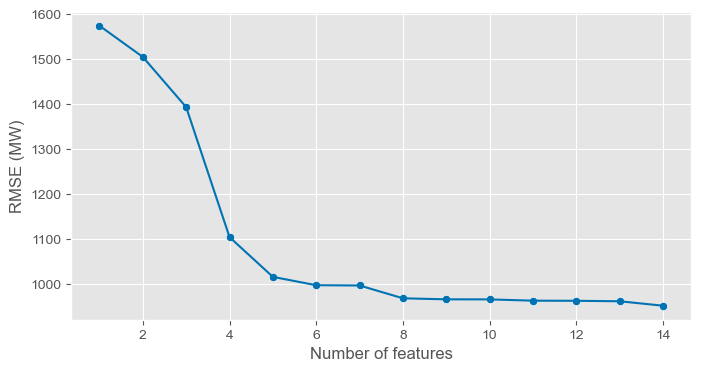

In [17]:
# plot number of features vs r2
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Feature_Selection_R2, x="Feature", y="r2")
sns.lineplot(data=Feature_Selection_R2, x="Feature", y="r2")
plt.ylabel('R\u00b2')
plt.xlabel('Number of features')
# plt.savefig('FIG1.eps', format='eps', dpi=1200)
plt.show()


# plot number of features vs RMSE
plt.figure(figsize=(8, 4))
sns.scatterplot(data=Feature_Selection_RMSE, x="Feature", y="RMSE")
sns.lineplot(data=Feature_Selection_RMSE, x="Feature", y="RMSE")
plt.ylabel('RMSE (MW)')
plt.xlabel('Number of features')
# plt.savefig('FIG2.eps', format='eps', dpi=1200)
plt.show()